# Homework 8 Phase Portraits and Cycles





# Phase portrait analysis of a chemostat

Question from H.T. Banks and Marie Davidian

A chemostat is a bioreactor where a microbial culture is continuously supplied with nutrients at a fixed rate and concomitantly harvested to keep the culture at a constant concentration. Chemostats are also used as microcosms in ecology and evolutionary biology as well as in wastewater treatment. 

Here, we consider the problem of growth of micro-organisms, for example, a population of bacteria requiring an energy source containing carbon for growth (say a simple sugar). Suppose we have some bacteria in a container, and we add nutrients continuously in this container (i.e., a continuous culture medium). Assume the bacteria's growth depends on a limiting nutrient
alone (i.e., all other nutrients are in excess and other conditions necessary for their growth are adequate). The container has an outlet so that nutrients and bacteria in the container can flow out. We further assume the container is well mixed.

Let:
- V be the volume of the chemost stat and equal to 1$L$.
- Q be the fixed volumetric flow rate and equal to 1 $L/h$.
- q = Q/V be the dilution rate ($h^{-1}$)
- N(t) be the mass of bacteria at time t. 
- c(t) be the concentration of nutrients ($g/L$) and $c_0$ be the concentration of nutrients in the feed line, equal to 8 g/L.
- r be the growth rate of bacteria ($h^{-1}$) where $r(c) = \frac{R_{max}c(t)}{(K_m+c(t))}$. Let $K_m = 4$ and $R_{max}=2$. 
- y is the yield parameter equal to 0.25 $unitless$.

\begin{align}
\dot{N} = rN(t)-qN(t)\\
\dot{c} = qc_0-qc(t)-y^{-1}rN(t)\\
\end{align}

.

In [2]:
# Use code below to install plotdf
!pip install plotdf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint


from math import sin
from plotdf import plotdf

1. Is this system linear or nonlinear? Defend your answer below. **Use a text cell.**

#### This system is nonlinear. The equation for dN/dt relies on two different variables that both change with time, N(t) and c(t). The variable c(t) itself is nonlinear as well.

2. Perform a phase plane analysis of this system. Be sure to carefully consider the bounds of your axes. If you use the program plotdf from class, be sure to read the help file. Be sure to add example trajectories to your plot that start at (x_0,y_0) = (1,1),(3,9) and (0.1,0.1).

C:\Anaconda_Python\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Anaconda_Python\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


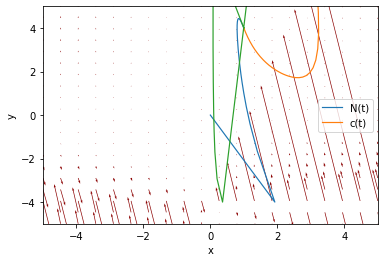

In [3]:
def f(x,Q=1,V=1,y=1,c0=1,q=1):
    Rmax = 2
    Km = 4
    return np.array([Rmax*x[1]/(Km+x[1])*x[0]-q*x[0],q*c0-q*x[1]-Rmax*x[1]/(Km+x[1])*x[0]/y])


plotdf(f, # Function giving the rhs of the diff. eq. system
     np.array([-5,5]), # [xmin,xmax]
     np.array([-5,5]),# [ymin,ymax]
     [(1,1),(3,9),(0.1,0.1)], # list of initial values for trajectories (optional)
     # Additional parameters for `f` (optional)
     parameters={"Q":1,"V":1,"y":0.25,"c0":8,"q":1},
     gridsteps=20,
     nsteps = 1000,
      tmax=100)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["N(t)","c(t)"]);

3. In words with a text cell, describe all important aspects of your phase portrait. How many steadystates exists? Under what starting conditions do we expect our chemostat to overshoot the steadystate concentration of nutrients? Under what starting conditions do we expect our chemostat to overshoot the steadystate concentration of bacteria? 

#### I really can't figure out what's going on in this plot. If I had to make a guess based on the phase portrait, I would say that it looks like there's two steady states on c(t) at x = 0 and x = 1, but I can't quite conclude anything from the N(t) plot. It seems pretty nonsensical (I'm sure someting I have is wrong), so there's not much to conclude from that function here.

4. As a hint for the part above, two steadystates exist. Perform an eigenvalue and eigenvector analysis on both. Add a point to your phase portrait indicating if the steadystate is stable (closed point) or unstable (open point). And add arrows indicating the directions of the corresponding eigenvectors. Make the length of the arrows correspond to the size of the eigenvalue.

Note that for an unstable node, the arrows should point away. For a stable node or direction, the arrows should point towards the node.

# Cycles in Glycolysis

Glycolysis is how cells breakdown sugars to produce energy and the concentrations of many proteins and molecules involved in this process have been shown to wax and wane over periods of time. Sel'kov proposed a simple model of glycolysis:
\begin{align}
\dot{x} = -x+ay+x^2y\\
\dot{y} = b - ay - x^2y\\
\end{align}
where x and y are nondimensionalized forms of ADP, F6P (a phosphate) and a,b > 0 are kinetic parameters. Let's explore the system dynamics for two scenarios.

1. Let a = .15 and b = 1.2. Construct a phase portrait of the system and be sure to include trajectories for (x_0,y_0) = (1,1) and (2,2).

C:\Anaconda_Python\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Anaconda_Python\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


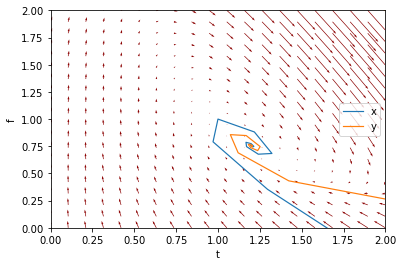

In [10]:
def f(x,a=1,b=1):
    return np.array([-x[0]+a*x[1]+x[0]**2*x[1],b-a*x[1]-x[0]**2*x[1]])

plotdf(f, # Function giving the rhs of the diff. eq. system
     np.array([0,2]), # [xmin,xmax]
     np.array([0,2]),# [ymin,ymax]
     [(1,1),(2,2)], # list of initial values for trajectories (optional)
     # Additional parameters for `f` (optional)
     parameters={"a":0.15,"b":1.2},
     gridsteps=20,
     nsteps = 100,
      tmax=100)
plt.xlabel("t")
plt.ylabel("f")
plt.legend(["x","y"]);

2. In the *text cell* below, describe the system dynamics you observed based on the phase portrait.

#### It appears that this system is stable in that both functions approach a steady state value at the center of their respective spirals. The phase portrait shows that the surrounding dynamics lead the values of both x and y to approach the steady state at ~(1.2,0.75)

3. Let a = 0.04 and b = 0.6. Construct a phase portrait of the system and be sure to include trajectories for (x_0,y_0) = (1,1) and (2,2).

C:\Anaconda_Python\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


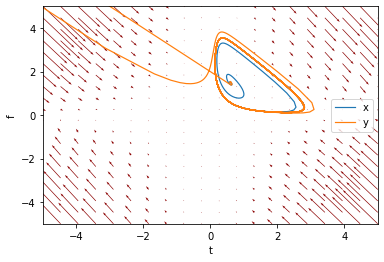

In [16]:
def f(x,a=1,b=1):
    return np.array([-x[0]+a*x[1]+x[0]**2*x[1],b-a*x[1]-x[0]**2*x[1]])

plotdf(f, # Function giving the rhs of the diff. eq. system
     np.array([-5,5]), # [xmin,xmax]
     np.array([-5,5]),# [ymin,ymax]
     [(1,1),(2,2)], # list of initial values for trajectories (optional)
     # Additional parameters for `f` (optional)
     parameters={"a":0.04,"b":0.6},
     gridsteps=20,
     nsteps = 1000,
      tmax=100)
plt.xlabel("t")
plt.ylabel("f")
plt.legend(["x","y"]);

4. In the *text cell* below, describe the system dynamics you observed based on the phase portrait.

#### It appears that the different a and b parameters have altered the shape of the function a decent bit, but the system still approaches a single steady state at the center of the two spirals. The phase portrait shows that the function approaches the steady state from all directions. This time, the steady state appears to be at roughly (0.75, 1.5).

5. We have seen that steadystates with complex eigenvalues with negative real parts are oscillatory and stable. How does the dynamics of a system near a steadystate with negative real-part, complex eigenvalues differ from a limit cycle? Explain in a text cell below.

Rather than a limit cycle behavior, eigenvalues with a negative real part plus (or minus) a complex part exhibit spiral like behavior. The system will be considered "stable" because it spirals toward its center where there is a steady state.